# KNN - K Nearest Neighbors

KNN es un algoritmo de aprendizaje supervisado que se utiliza para clasificación y regresión. En este caso, se utilizará para clasificación. La idea básica detrás de KNN es que los puntos de datos que son similares deben pertenecer a la misma clase. Por lo tanto, KNN clasifica un punto de datos basado en cómo se clasifican sus vecinos más cercanos.

En este cuaderno, se implementará KNN desde cero y se comparará con la implementación de la biblioteca scikit-learn.

Algo importante a considerar es que KNN es un algoritmo de aprendizaje lento, ya que necesita calcular la distancia entre el punto de datos de prueba y todos los puntos de datos de entrenamiento. Por lo tanto, no es adecuado para conjuntos de datos grandes.

### Valor K

El valor de K es un hiperparámetro que se debe ajustar. Un valor de K más pequeño significa que el modelo es más sensible al ruido, mientras que un valor de K más grande suaviza la frontera de decisión. Por lo tanto, es importante encontrar el valor de K correcto para el problema en cuestión.

<div style="text-align: center">
<img src="./assets/knn-explained.png" width="400">
</div>

#### Distancia Euclidiana
<div style="text-align: center">
<img src="./assets/euclidian-distance.png" width="400">
</div>

La distancia euclidiana es una medida de la distancia entre dos puntos en un espacio euclidiano. Es la raíz cuadrada de la suma de las diferencias cuadradas entre las coordenadas de los puntos.

### Distancia de Manhattan
<div style="text-align: center">
<img src="./assets/manhattan-distance.png" width="400">
</div>

La distancia de Manhattan es una medida de la distancia entre dos puntos en un espacio euclidiano en el que la distancia entre los puntos es la suma de las diferencias absolutas de sus coordenadas.

## Dataset

El conjunto de datos que se utilizará en este cuaderno es el conjunto de datos de flores Iris. Este conjunto de datos consta de 150 muestras de flores de iris de tres especies diferentes: setosa, versicolor y virginica. Cada muestra tiene cuatro características: longitud del sépalo, ancho del sépalo, longitud del pétalo y ancho del pétalo.

In [1]:
# Instalación librerías
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [19]:
# Importación de librerías
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
sns.set_theme(style='white', color_codes=True)

In [3]:
# Carga de datos
iris_datos_path = './assets/Iris.csv'
iris_datos = pd.read_csv(iris_datos_path, delimiter=',')
iris_datos.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
# Describir datos
iris_datos.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Ver cuantas clases tenemos -> Y = target
species = list(iris_datos['Species'].unique())
species # 3 clases (setosa, versicolor, virginica)

['setosa', 'versicolor', 'virginica']

In [7]:
iris_datos['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

/Users/sebastiancb/anaconda3/envs/env-talentotech-bootcamp/lib/python3.12/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


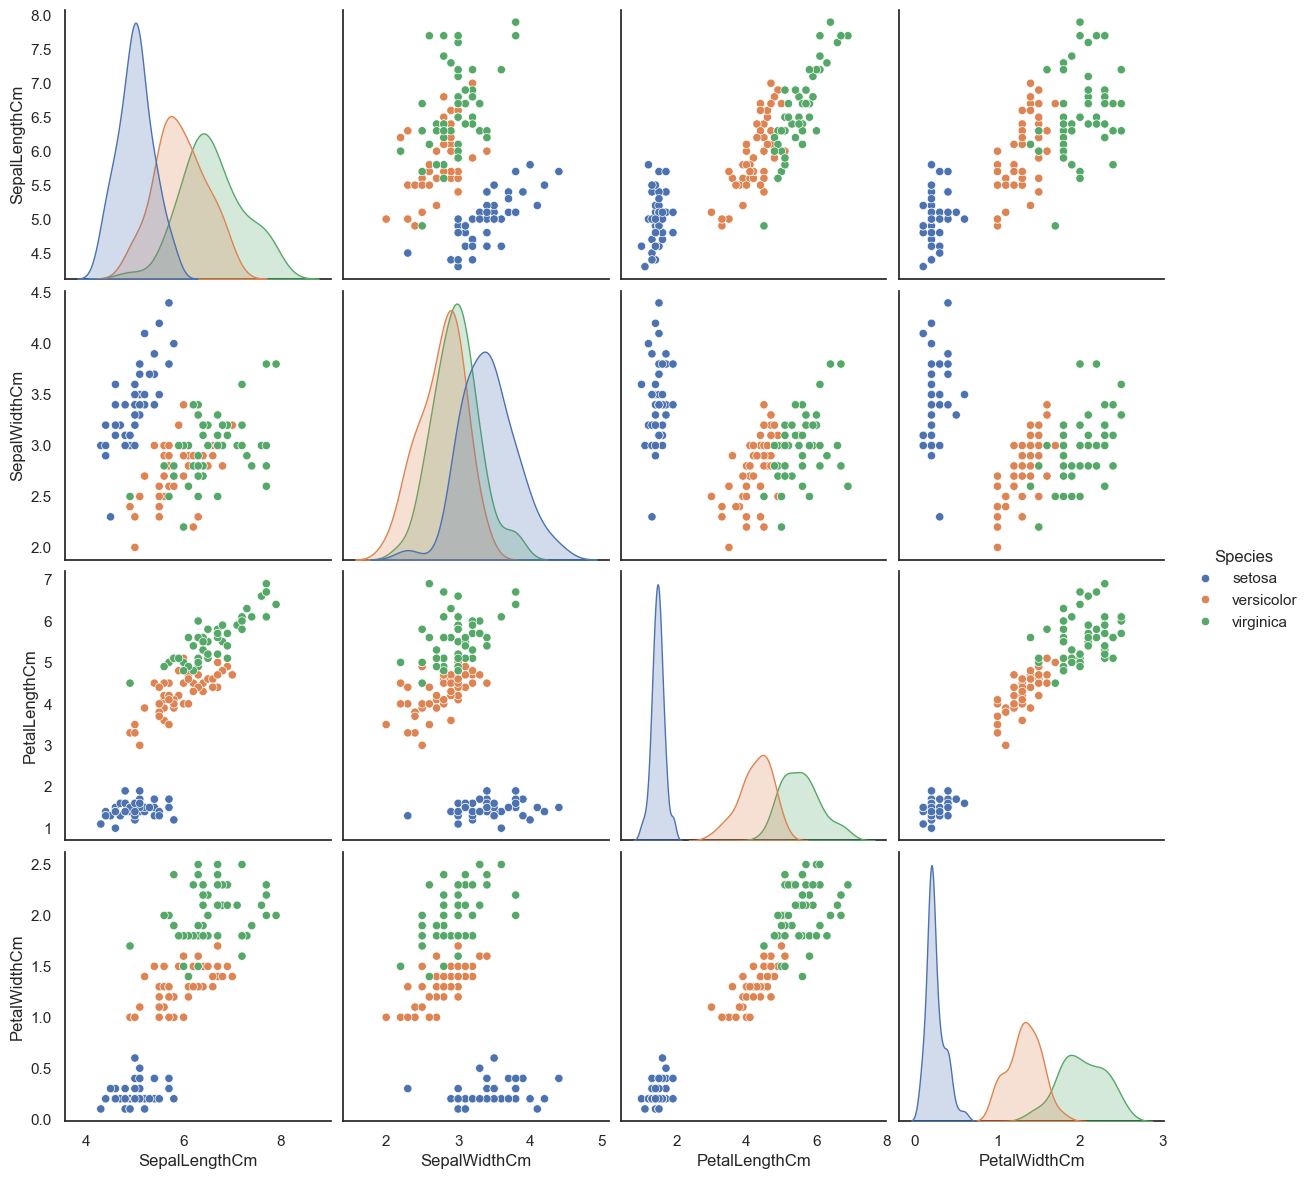

In [11]:
sns.pairplot(iris_datos, hue='Species', size=3)

In [14]:
# Definición de la data
X = iris_datos[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] # independientes
y = iris_datos['Species'] # dependiente

In [15]:
# Definición del conjunto de datos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Definición del modelo
k = 11 # número de vecinos - Debe ser impar debido a que se necesita un desempate
knn_modelo = KNeighborsClassifier(n_neighbors=k)
knn_modelo.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [21]:
# Predicción
y_train_pred = knn_modelo.predict(x_train)

In [22]:
# Matriz de confusión
confusion_matrix(y_train, y_train_pred)

array([[40,  0,  0],
       [ 0, 37,  4],
       [ 0,  1, 38]])

In [23]:
# Predicción data de prueba
y_test_pred = knn_modelo.predict(x_test)
confusion_matrix(y_test, y_test_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

In [24]:
dato_nuevo = np.array([[5.1, 3.5, 1.4, 0.2]])
resultado = knn_modelo.predict(dato_nuevo)
resultado


/Users/sebastiancb/anaconda3/envs/env-talentotech-bootcamp/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['setosa'], dtype=object)